In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
health=pd.read_csv("https://github.com/shabbar88/LATEST-DATA--SCIENCE/raw/main/WC_AT.csv")

In [3]:
health.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [4]:
health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [5]:
health.isna().sum()

Waist    0
AT       0
dtype: int64

In [6]:
health.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [8]:
health.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


<Axes: >

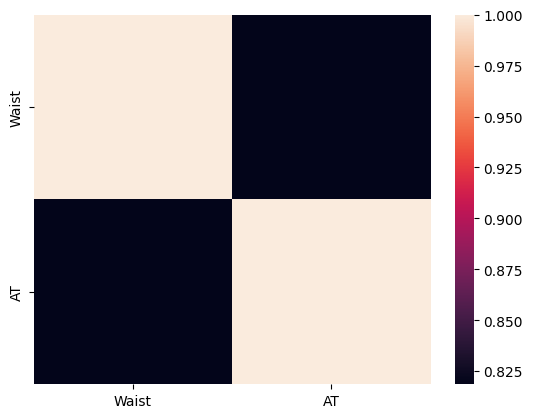

In [9]:
sns.heatmap(health.corr())

In [14]:
import warnings
warnings.filterwarnings("ignore")

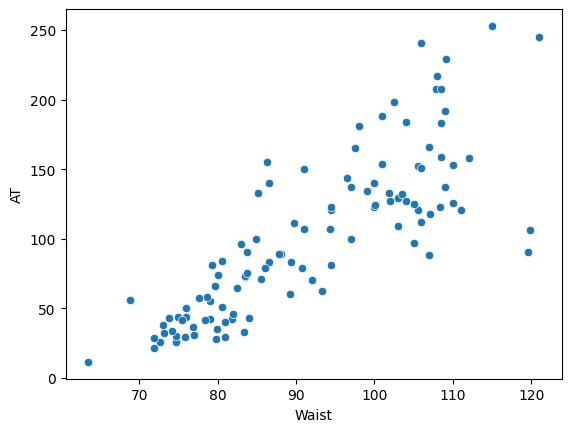

In [15]:
sns.scatterplot(x=health['Waist'],y=health['AT'],data=health,palette='set2');

<Axes: xlabel='Waist', ylabel='Count'>

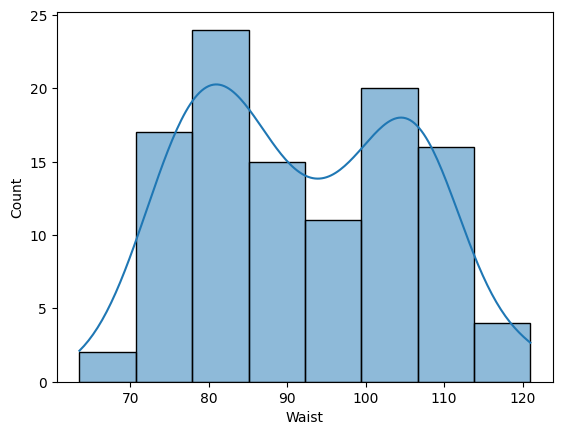

In [12]:
sns.histplot(health['Waist'],kde=True)

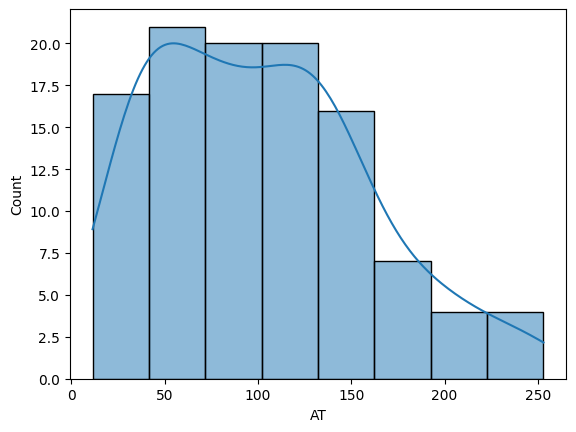

In [17]:
sns.histplot(health['AT'],kde=True);

In [18]:
health.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [19]:
# Fitting a linear regression model
import seaborn as sns
import statsmodels.formula.api as smf

In [20]:
#OLS=Ordinary Least Squares
model = smf.ols("AT~Waist",data = health).fit()

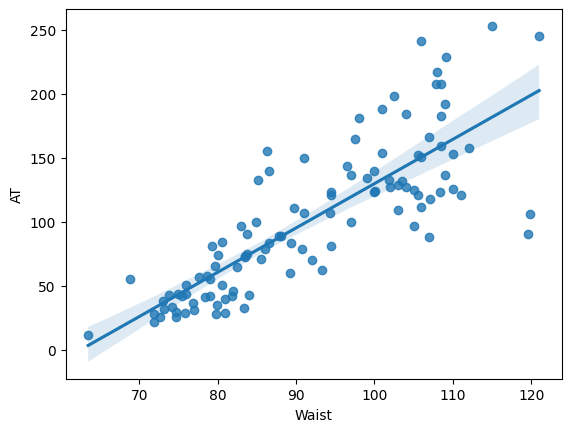

In [22]:
#To see the best fit line (which is as close as possible to as many points as possible)
sns.regplot(x="Waist", y="AT", data=health);

In [33]:
#Coefficients
#Interpretation for Beta Coefficient of WT
#For every unit increase in the Waist  value, the value for AT will increase by 3.458859
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [24]:
model.pvalues

Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64

In [25]:
health.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [26]:
#To see the model predictions
model.fittedvalues

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

#y = B0 + B1*X1 + e
#B0 - Intercept
#B1 - Slope
#X1 - Independent data point
#e (error) - Vertical distance between the actual 'AT' value & the AT fitted value

In [27]:
health['Predicted']=model.fittedvalues
health[0:5]

,Waist,AT,Predicted
0,74.75,25.72,42.568252
1,72.60,25.89,35.131704
2,81.80,42.60,66.953210
3,83.95,42.80,74.389758
4,74.65,29.84,42.222366


In [31]:
health.drop(columns=['Predicted1'],axis=1,inplace=True)

In [32]:
health.head()

,Waist,AT,Predicted
0,74.75,25.72,42.568252
1,72.60,25.89,35.131704
2,81.80,42.60,66.953210
3,83.95,42.80,74.389758
4,74.65,29.84,42.222366


In [36]:
#For Manual Calculations
health['Predicted1']=-215.981488 + ( 3.458859* health['Waist'])
health[0:5]

,Waist,AT,Predicted,Predicted1
0,74.75,25.72,42.568252,42.568222
1,72.60,25.89,35.131704,35.131675
2,81.80,42.60,66.953210,66.953178
3,83.95,42.80,74.389758,74.389725
4,74.65,29.84,42.222366,42.222336


In [37]:
#To generate the residual values
#Difference between Actual & Fitted Values
health['Error']=model.resid
health[0:5]

,Waist,AT,Predicted,Predicted1,Error
0,74.75,25.72,42.568252,42.568222,-16.848252
1,72.60,25.89,35.131704,35.131675,-9.241704
2,81.80,42.60,66.953210,66.953178,-24.353210
3,83.95,42.80,74.389758,74.389725,-31.589758
4,74.65,29.84,42.222366,42.222336,-12.382366


In [38]:
health['Error1']=health['AT'] - health['Predicted']
health[0:5]

,Waist,AT,Predicted,Predicted1,Error,Error1
0,74.75,25.72,42.568252,42.568222,-16.848252,-16.848252
1,72.60,25.89,35.131704,35.131675,-9.241704,-9.241704
2,81.80,42.60,66.953210,66.953178,-24.353210,-24.353210
3,83.95,42.80,74.389758,74.389725,-31.589758,-31.589758
4,74.65,29.84,42.222366,42.222336,-12.382366,-12.382366


In [39]:
health['Error_Sq']=(health['Error'])**2
health[0:5]

,Waist,AT,Predicted,Predicted1,Error,Error1,Error_Sq
0,74.75,25.72,42.568252,42.568222,-16.848252,-16.848252,283.863582
1,72.60,25.89,35.131704,35.131675,-9.241704,-9.241704,85.409091
2,81.80,42.60,66.953210,66.953178,-24.353210,-24.353210,593.078852
3,83.95,42.80,74.389758,74.389725,-31.589758,-31.589758,997.912810
4,74.65,29.84,42.222366,42.222336,-12.382366,-12.382366,153.322979


In [40]:
#Y = B0 + B1*X + e
#c=-215.981488
#m=3.458859


health['Y']= -215.981488 + (3.458859 * health['Waist']) + health['Error']
health[0:5]

,Waist,AT,Predicted,Predicted1,Error,Error1,Error_Sq,Y
0,74.75,25.72,42.568252,42.568222,-16.848252,-16.848252,283.863582,25.719971
1,72.60,25.89,35.131704,35.131675,-9.241704,-9.241704,85.409091,25.889971
2,81.80,42.60,66.953210,66.953178,-24.353210,-24.353210,593.078852,42.599968
3,83.95,42.80,74.389758,74.389725,-31.589758,-31.589758,997.912810,42.799967
4,74.65,29.84,42.222366,42.222336,-12.382366,-12.382366,153.322979,29.839971


In [41]:
Mean_Squared_Error=health['Error_Sq'].mean()
Mean_Squared_Error

1073.2292295533816

In [42]:
model.rsquared
#67% of variation in the dependent variable is explained by the given independent variable

0.670036893052843

In [43]:
#Null Hypothesis - Waist  doesn't affect the AT significantly.
#Alternate Hypothesis - Waist significantly affects the MPG.

#Since p-value is less then 0.05 for 'Waist' variable,
#We can say that it is a significant variable in predicting the dependent variable 'AT'
model.pvalues

Intercept    8.197416e-17
Waist        1.618607e-27
dtype: float64

In [44]:
# PREDICT FOR NEW DATA POINT
newdata=pd.Series([40,50,70,45,39])
newdata

0    40
1    50
2    70
3    45
4    39
dtype: int64

In [45]:
health_test=pd.DataFrame(newdata,columns=['Waist'])
health_test

,Waist
0,40
1,50
2,70
3,45
4,39


In [46]:
model.predict(health_test)

0   -77.627112
1   -43.038518
2    26.138669
3   -60.332815
4   -81.085972
dtype: float64

In [47]:
health.head()

,Waist,AT,Predicted,Predicted1,Error,Error1,Error_Sq,Y
0,74.75,25.72,42.568252,42.568222,-16.848252,-16.848252,283.863582,25.719971
1,72.60,25.89,35.131704,35.131675,-9.241704,-9.241704,85.409091,25.889971
2,81.80,42.60,66.953210,66.953178,-24.353210,-24.353210,593.078852,42.599968
3,83.95,42.80,74.389758,74.389725,-31.589758,-31.589758,997.912810,42.799967
4,74.65,29.84,42.222366,42.222336,-12.382366,-12.382366,153.322979,29.839971


In [48]:
health_test['Predicted']=model.predict(health_test)

In [49]:
health_test[0:5]

,Waist,Predicted
0,40,-77.627112
1,50,-43.038518
2,70,26.138669
3,45,-60.332815
4,39,-81.085972


In [52]:
model.predict(pd.DataFrame(columns=['Waist'],data=[90,100]))

0     95.315857
1    129.904451
dtype: float64